#**Back Propagation**

#Step 1 : import libraries

In [439]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Step 2 :Load the Dataset
###Upload palmer penguins dataset " / LAB/ Dataset/ penguins.csv





In [441]:
# Loading dataset
ds = pd.read_csv('penguins.csv')
ds

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [442]:
ds['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [443]:
ds.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [444]:
new_data = ds.dropna(axis=0, how='any')

In [445]:
new_data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [446]:
new_data.shape

(333, 7)

In [447]:
new_data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE


In [448]:
new_data.duplicated().sum()

0

In [449]:
label = LabelEncoder()

new_data['island'] = label.fit_transform(new_data['island'])
new_data['sex'] = label.fit_transform(new_data['sex'])
new_data['species'] = label.fit_transform(new_data['sex'])

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_8090/160125980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['island'] = label.fit_transform(new_data['island'])
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_8090/160125980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['sex'] = label.fit_transform(new_data['sex'])
/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_8090/160125980.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [450]:
new_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,1,2,39.3,20.6,190.0,3650.0,1


In [451]:
# Dividing the dataset into target variable and features
X=new_data.drop('species',axis=1)
y=new_data['species']

In [452]:
X.shape

(333, 6)

In [453]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [454]:
X

array([[ 1.88939197, -0.89604189,  0.7807321 , -1.42675157, -0.56847478,
         0.99103121],
       [ 1.88939197, -0.82278787,  0.11958397, -1.06947358, -0.50628618,
        -1.00904996],
       [ 1.88939197, -0.67627982,  0.42472926, -0.42637319, -1.1903608 ,
        -1.00904996],
       ...,
       [-0.91313599,  1.17338426, -0.74499437,  1.50292796,  1.91906927,
         0.99103121],
       [-0.91313599,  0.22108196, -1.20271231,  0.78837197,  1.23499466,
        -1.00904996],
       [-0.91313599,  1.08181673, -0.54156417,  0.85982757,  1.48374906,
         0.99103121]])

In [455]:
y.shape

(333,)

In [456]:
y

0      1
1      0
2      0
4      0
5      1
      ..
338    0
340    0
341    1
342    0
343    1
Name: species, Length: 333, dtype: int64

#Step 3: Split Dataset in Training and Testing


In [458]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Step 4 : initializing the hyperparameters

In [563]:
learning_rate = 0.01
iterations = 3000
N = y_train.size

# Input features
input_size = 6

# Hidden layers
hidden_size = 3

# Output layer
output_size = 3

#Step 5 : Initialize Weights

In [566]:
np.random.seed(10)

# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))

# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size))

#Step 6 : mean squared error, accuracy and sigmoid.



In [569]:
# Helper functions

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]

    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(y_pred.shape)

    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((y_pred - y_true_reshaped)**2).sum() / (2*y_pred.size)

    return error

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) ==  y_true.argmax(axis=1)
    return acc.mean()

results = pd.DataFrame(columns=["mse", "accuracy"])

# Step 7 : Building the Backpropogation Model in Python
###We will create a for loop for a given number of iterations and will update the weights in each iteration. The model will go through three phases feedforward propagation, the error calculation phase, and the backpropagation phase.


In [572]:
# Training loop
for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)

    # Calculate error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(np.eye(output_size)[y_train], A2)
    new_row = pd.DataFrame({"mse": [mse], "accuracy": [acc]})
    results = pd.concat([results, new_row], ignore_index=True)

    # Backpropagation
    E1 = A2 - np.eye(output_size)[y_train]
    dW1 = E1 * A2 * (1 - A2)
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    # Update weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N
    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

/var/folders/8w/pd5cnwsd4616sv8_6d54k0gr0000gn/T/ipykernel_8090/807832057.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row], ignore_index=True)


# Step 8 : Plot the mean squared error and accuracy using the pandas plot() function.



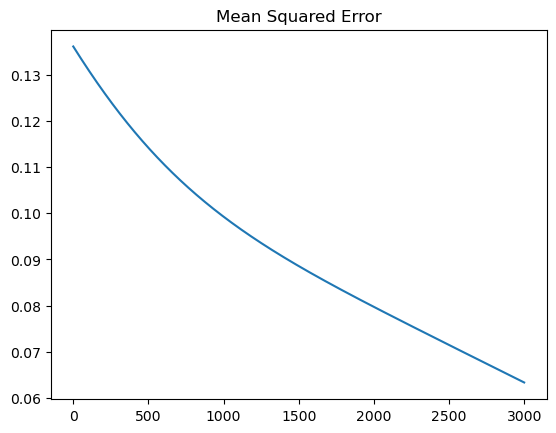

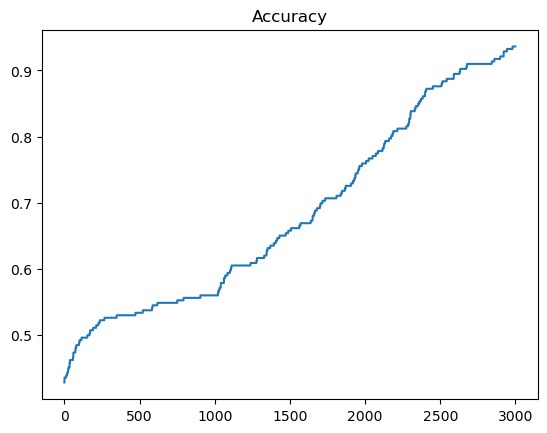

In [575]:
results.mse.plot(title="Mean Squared Error")
plt.show()
results.accuracy.plot(title="Accuracy")
plt.show()

###Now we will calculate the accuracy of the model.



In [578]:
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
test_acc = accuracy(np.eye(output_size)[y_test], A2)
print("Test accuracy: {}".format(test_acc))

Test accuracy: 0.9552238805970149


#**Well Done :)**